In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imputation-result/mode.jpg
/kaggle/input/imputation-result/median.jpg
/kaggle/input/imputation-result/MICE.jpg
/kaggle/input/imputation-result/mean.jpg
/kaggle/input/imputation-result/knn.jpg
/kaggle/input/co2-emissions/original.csv
/kaggle/input/co2-emissions/train.csv
/kaggle/input/co2-emission/train.csv


**Imputation Methods**
>1. Mean
>2. Mode
>3. Median
>2. KNN Imputer
>3. MICE 

In this Notebook, we will go over the techniques mentioned above for imputation of missing values in a data set.

**let's  Look at first 10 rows** 

I added nan values to the original dataset to determine which imputation method is |close to the original value.

In [2]:
train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
original = pd.read_csv('/kaggle/input/co2-emissions/original.csv')

In [3]:
# This train data set -- here we looking at first 10 rows
train.head(10)

FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0                   9.9                  6.7                   NaN   
1                   NaN                  7.7                   9.6   
2                   6.0                  5.8                   5.9   
3                  12.7                  9.1                  11.1   
4                  12.1                  NaN                  10.6   
5                  11.9                  7.7                   NaN   
6                   NaN                  8.1                  10.1   
7                  12.8                  9.0                  11.1   
8                  13.4                  9.5                  11.6   
9                  10.6                  7.5                   9.2   

   FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      33.0           196  
1                      29.0           221  
2                      48.0           136  
3                       NaN           255  
4                      27.0           244  
5                      28.0           230  
6                      28.0           232  
7                      25.0           255  
8                       NaN           267  
9                      31.0           212

In [4]:
# This is original dataset
original.head(10)

FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0                   9.9                  6.7                   8.5   
1                  11.2                  7.7                   9.6   
2                   6.0                  5.8                   5.9   
3                  12.7                  9.1                  11.1   
4                  12.1                  8.7                  10.6   
5                  11.9                  7.7                  10.0   
6                  11.8                  8.1                  10.1   
7                  12.8                  9.0                  11.1   
8                  13.4                  9.5                  11.6   
9                  10.6                  7.5                   9.2   

   FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                        33           196  
1                        29           221  
2                        48           136  
3                        25           255  
4                        27           244  
5                        28           230  
6                        28           232  
7                        25           255  
8                        24           267  
9                        31           212

In [5]:
# to get know how many nan values
train.isna().sum()

FUELCONSUMPTION_CITY         8
FUELCONSUMPTION_HWY          8
FUELCONSUMPTION_COMB        10
FUELCONSUMPTION_COMB_MPG    10
CO2EMISSIONS                 0
dtype: int64

1. Mean

> Replacing nan(missing value) with respective column mean value

In [6]:
train = pd.read_csv('/kaggle/input/co2-emission/train.csv')

# approach 1
mean = train.mean()
mean_imputed_data = train.fillna(mean)



#approach 2
from sklearn.impute import SimpleImputer

train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
X = train.drop('CO2EMISSIONS' ,axis=1) # Independant
y = train['CO2EMISSIONS'] #Target


mean_imputer = SimpleImputer(strategy='mean')

mean_imputed = mean_imputer.fit_transform(X)

Analyzing imputed values
>* Yellow colour boxes in the image below contain imputed values. i.e mean_imputed
>* Original numbers are contained in green colour boxes.

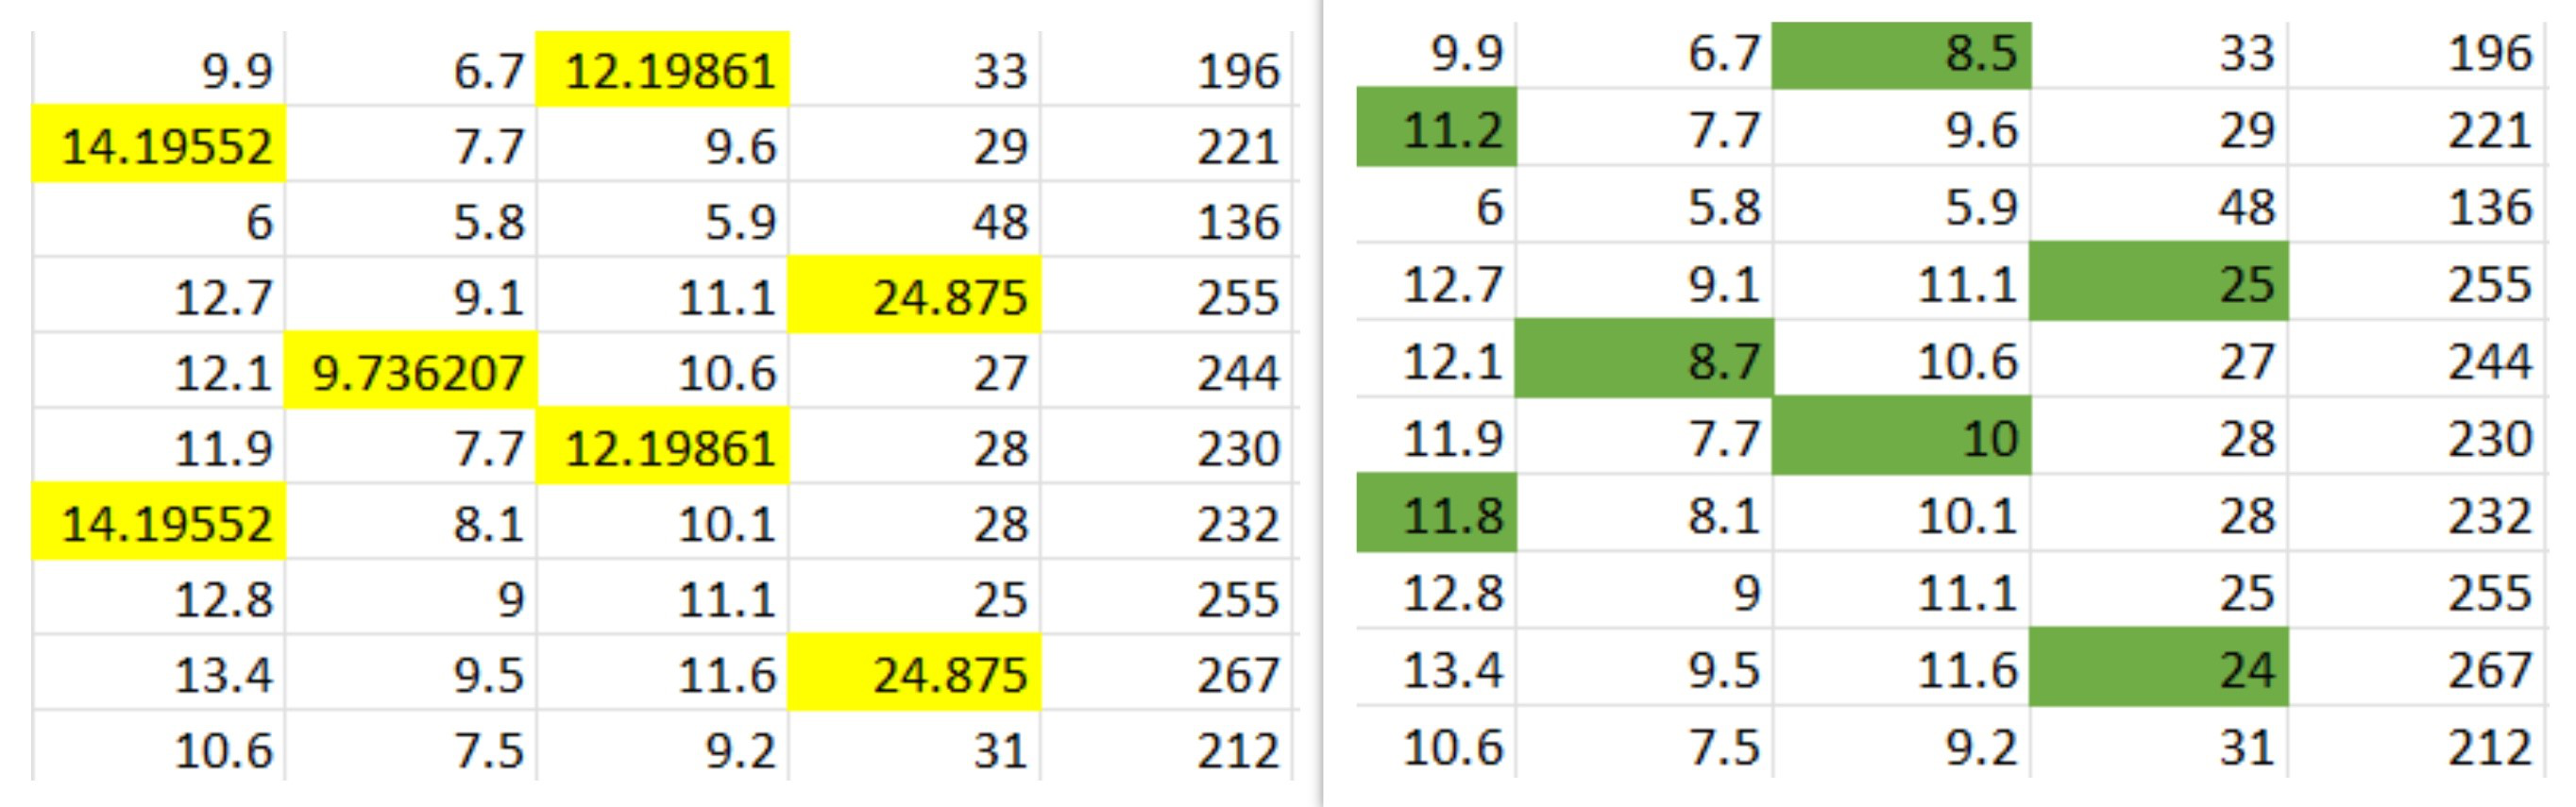

In [7]:
from PIL import Image
mean_image = Image.open('/kaggle/input/imputation-result/mean.jpg')
mean_image

* First column - original value is 11.2 and imputed value is 14.19 , original value is 11.8 and imputed value is 14.19
>1. diff_1  = |14.19 - 11.2| = 2.99
>2. diff_2  = |14.19 - 11.8| = 2.39

* Second column - original value is 8.7 and imputed value is 9.73
>1. diff = |9.73 - 8.7| = 1.03

* Third Column - original value is 8.5 and imputed value is 12.19 , original value is 10 and imputed value is 12.19
>1. diff_1  = |8.5 - 12.19| = 3.69
>2. diff_2  = |10 - 12.19| = 2.19

* Fourth Columns - original value is 25 and imputed value is 24.875 , original value is 24 and imputed value is 24.875
>1. diff_1  = |25 - 24.875| = 0.125
>2. diff_2  = |24- 24.875| = 0.875

**SSE  = 34.90|**


2. Mode

> Replacing Nan(missing value) with most frequent value i.e mode 

In [8]:
# approach 1
train = pd.read_csv('/kaggle/input/co2-emission/train.csv')

mode = train.mode()

mode_imputed_data = train.fillna(mode.iloc[0])


# approach 2
from sklearn.impute import SimpleImputer

train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
X = train.drop('CO2EMISSIONS' ,axis=1) # Independant
y = train['CO2EMISSIONS'] #target


mode_imputer = SimpleImputer(strategy='most_frequent')

mode_imputed = mode_imputer.fit_transform(X)

Analyzing imputed values

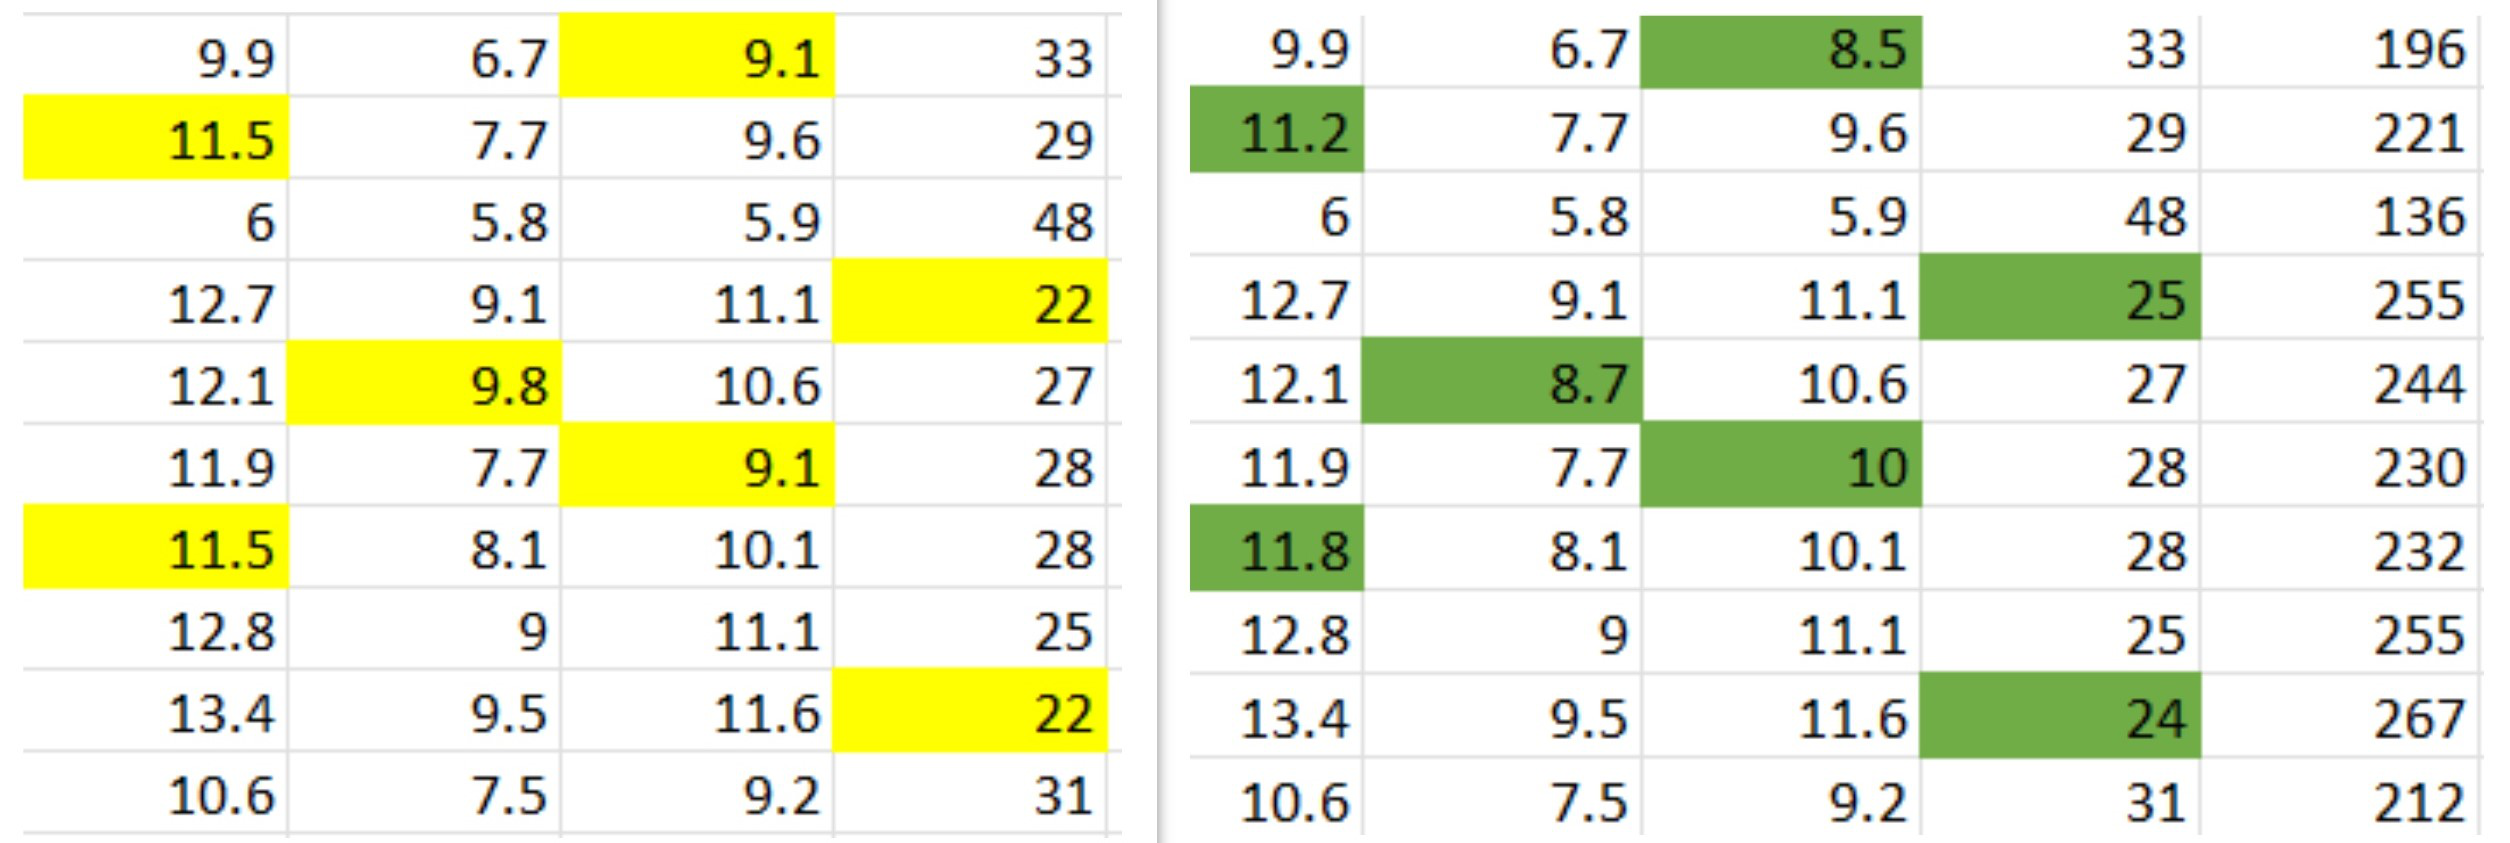

In [9]:
from PIL import Image
mode_image = Image.open('/kaggle/input/imputation-result/mode.jpg')
mode_image

* First column - original value is 11.2 and imputed value is 11.5 , original value is 11.8 and imputed value is 11.8
>1. diff_1  = |11.5 - 11.2| = 0.3
>2. diff_2  = |11.5 - 11.8| = 0.3

* Second column - original value is 8.7 and imputed value is 9.8
>1. diff = |9.8 - 8.7| = 1.1

* Third Column - original value is 8.5 and imputed value is 9.1 , original value is 10 and imputed value is 9.1
>1. diff_1  = |8.5 - 9.1| = 0.6
>2. diff_2  = |10 - 9.1| = 0.9

* Fourth Columns - original value is 25 and imputed value is 22 , original value is 24 and imputed value is 22
>1. diff_1  = |25 - 22| = 3
>2. diff_2  = |24- 22| = 2

**SSE  = 15.36**


3. Median

> Replacing Nan(missing value) with median value

In [10]:
# approach1
train = pd.read_csv('/kaggle/input/co2-emission/train.csv')

median = train.median()
median_imputed_data = train.fillna(median)


# approach 2
from sklearn.impute import SimpleImputer

train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
X = train.drop('CO2EMISSIONS' ,axis=1) # Independant
y = train['CO2EMISSIONS'] #target


median_imputer = SimpleImputer(strategy='median')

median_imputed = median_imputer.fit_transform(X)


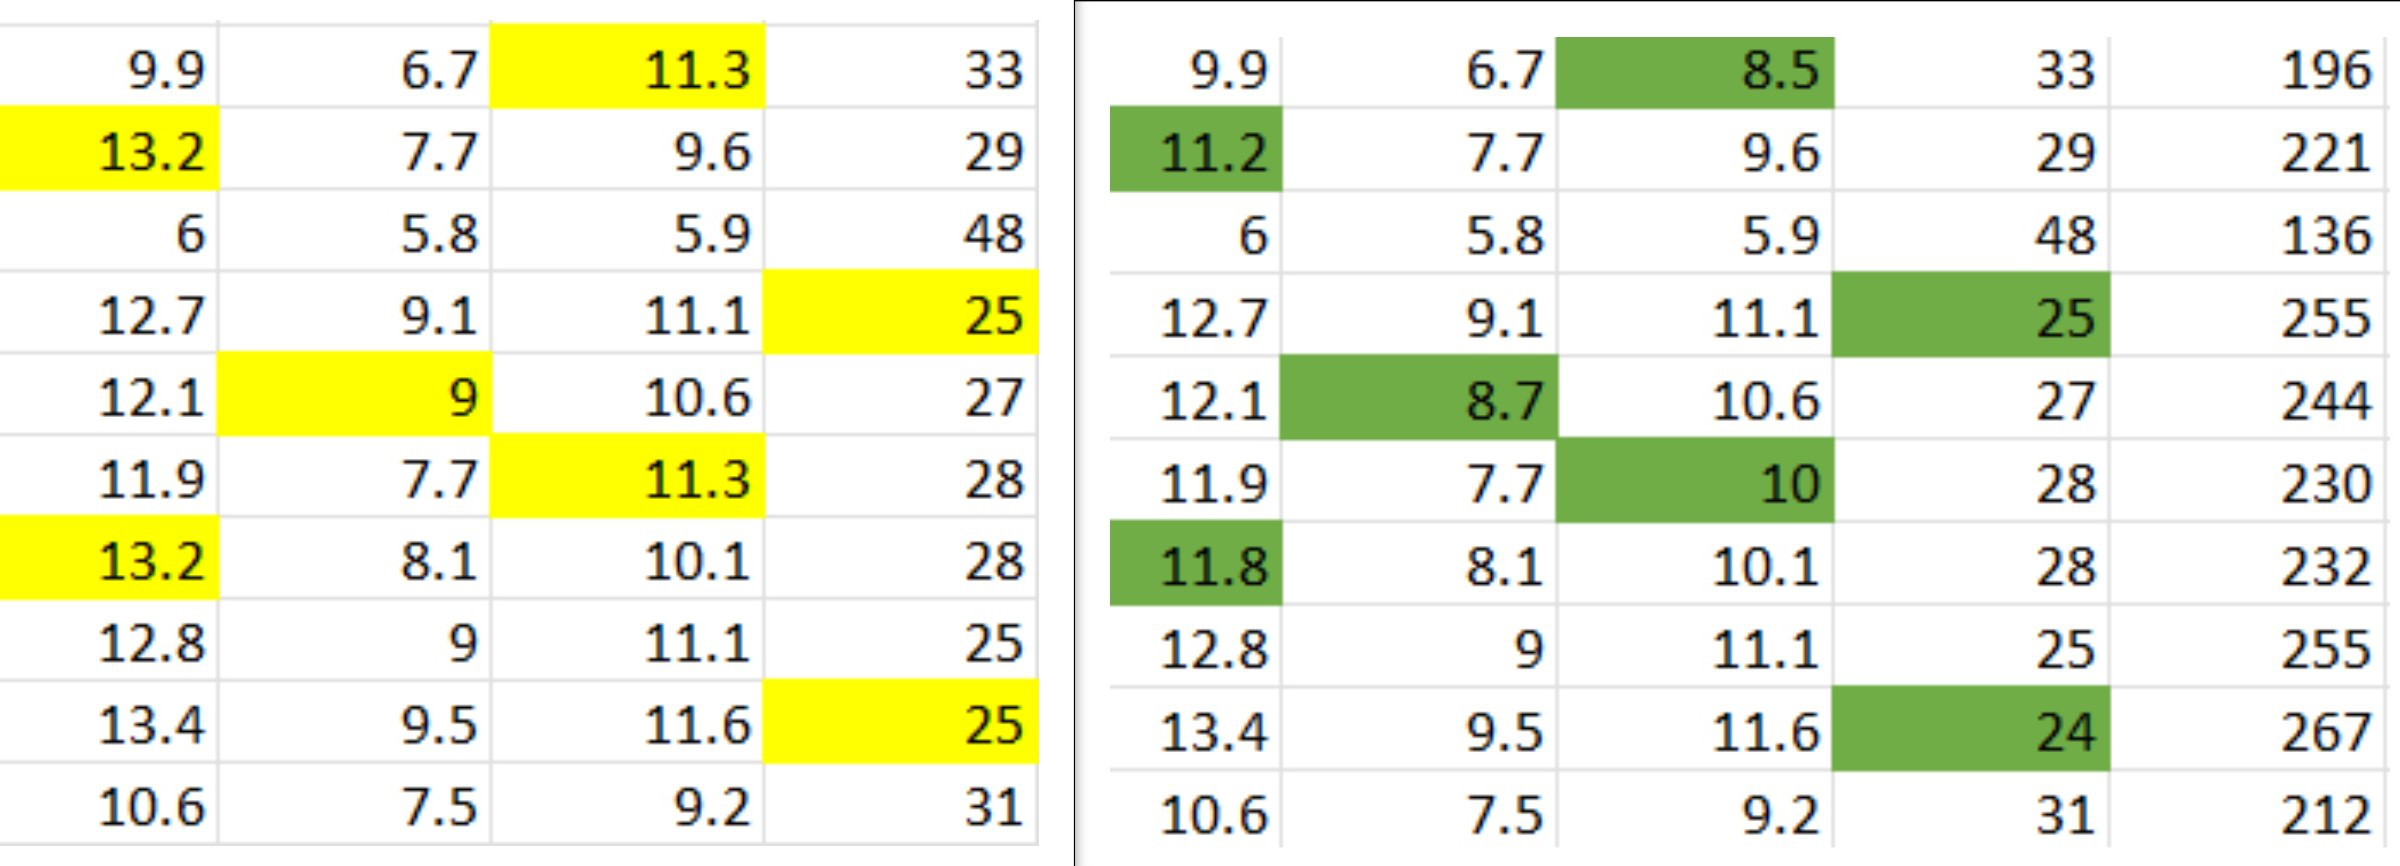

In [11]:
from PIL import Image
Median_image = Image.open('/kaggle/input/imputation-result/median.jpg')
Median_image

* First column - original value is 11.2 and imputed value is 13.2 , original value is 11.8 and imputed value is 13.2
>1. diff_1  = |13.2 - 11.2| = 2
>2. diff_2  = |13.2 - 11.8| = 1.4

* Second column - original value is 8.7 and imputed value is 9
>1. diff = |9 - 8.7| = 0.3

* Third Column - original value is 8.5 and imputed value is 11.3 , original value is 10 and imputed value is 11.3
>1. diff_1  = |8.5 - 11.3| = 2.8
>2. diff_2  = |10 - 11.3| = 1.3

* Fourth Columns - original value is 25 and imputed value is 25 , original value is 24 and imputed value is 24
>1. diff_1  = |25 - 25| = 0
>2. diff_2  = |25- 24| = 1

**SSE  = 16.58**


4 . KNN Imputer
> Replacing nan(missing value)  with mean of nearest point

In [12]:
from sklearn.impute import KNNImputer

train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
X = train.drop('CO2EMISSIONS' ,axis=1) # Independant
y = train['CO2EMISSIONS'] #target


knn = KNNImputer()
knn_data = knn.fit_transform(X,y)

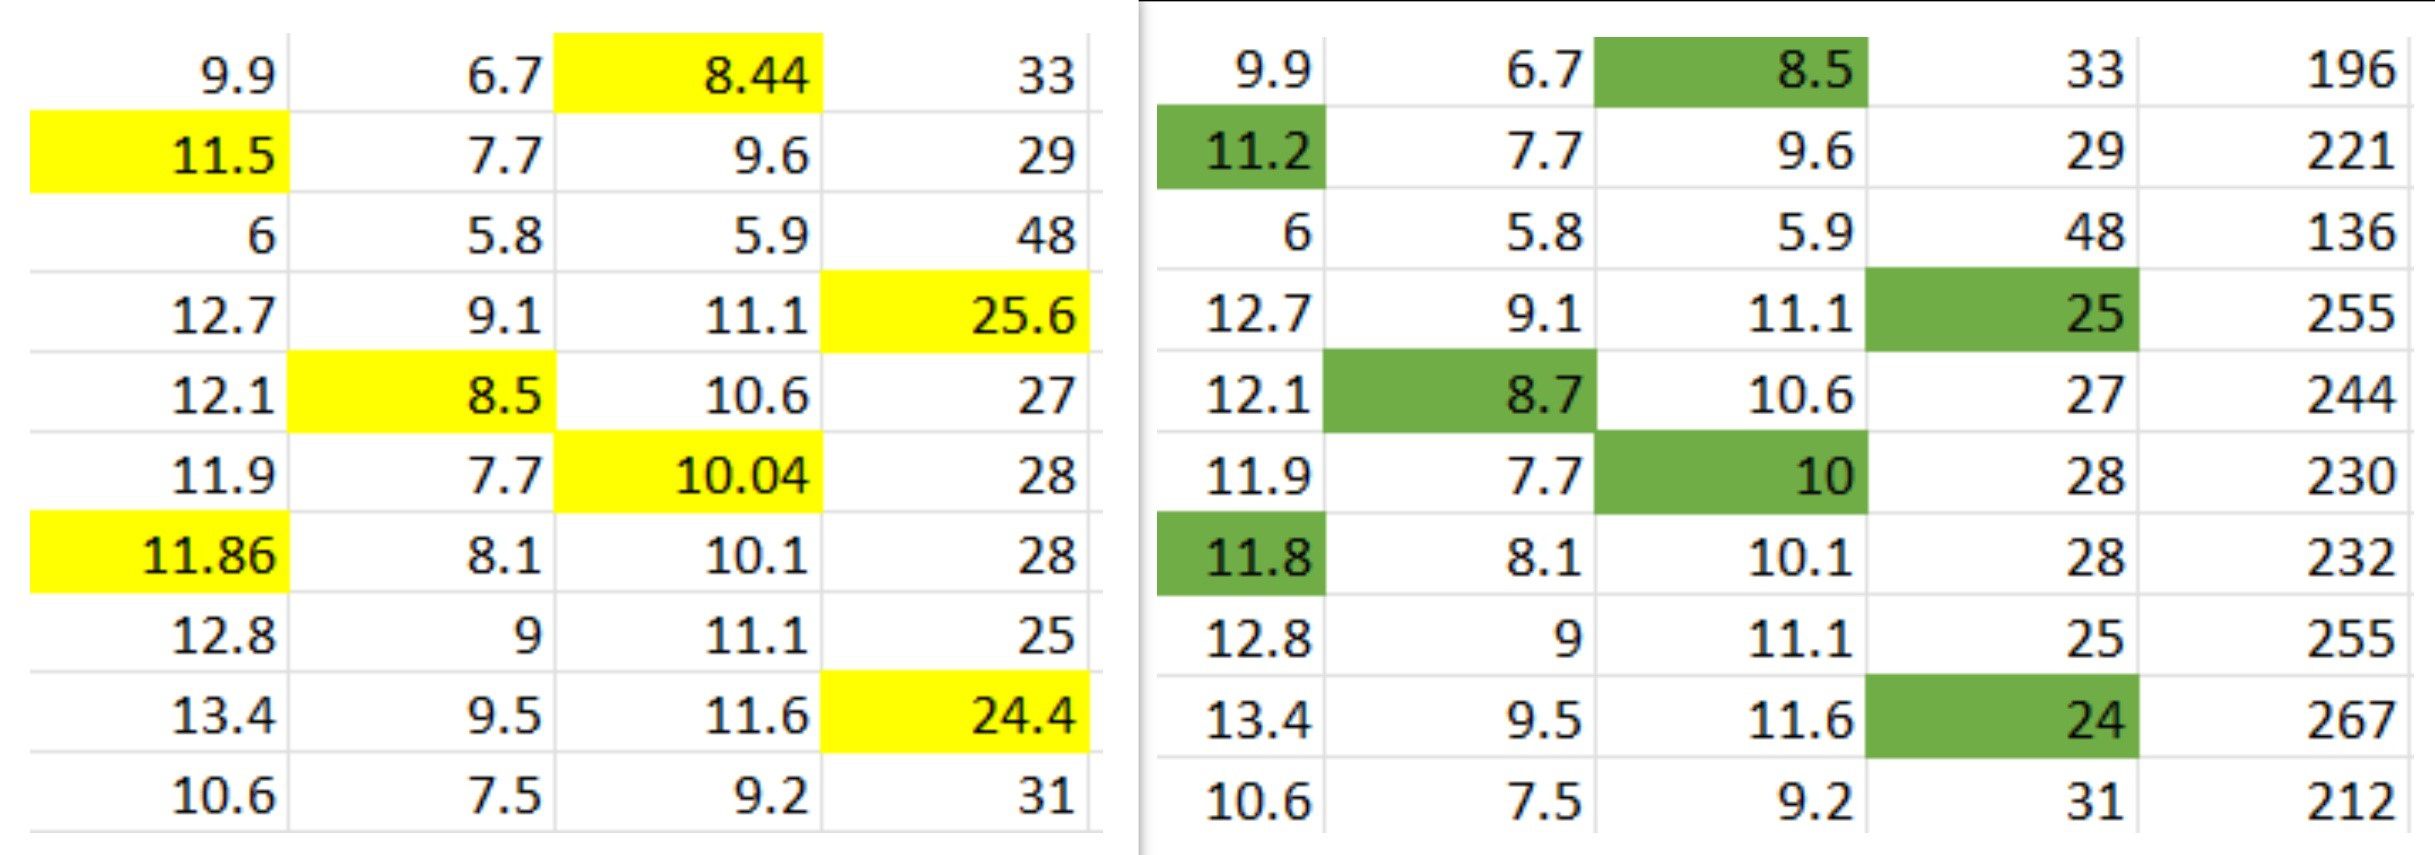

In [13]:
from PIL import Image
knn_image = Image.open('/kaggle/input/imputation-result/knn.jpg')
knn_image

* First column - original value is 11.2 and imputed value is 11.5 , original value is 11.8 and imputed value is 11.86
>1. diff_1  = |11.5 - 11.2| = 0.3
>2. diff_2  = |11.86 - 11.8| = 0.06

* Second column - original value is 8.7 and imputed value is 8.7
>1. diff = |8.5 - 8.7| = 0.2

* Third Column - original value is 8.5 and imputed value is 8.44 , original value is 10 and imputed value is 10.04
>1. diff_1  = |8.5 - 8.44| = 0.06
>2. diff_2  = |10 - 10.04| = 0.04

* Fourth Columns - original value is 25 and imputed value is 25.6 , original value is 24 and imputed value is 24.4
>1. diff_1  = |25 - 25.6| = 0.6
>2. diff_2  = |25- 24.4| = 0.6

**SSE  = 0.8588**


5. MICE - ( Multivariate Imputation by Chained Equation)

> Use a regression model to predict missing values based on the dataset's other variables.


In [14]:
pip install fancyimpute

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=a17074bb7102a531994a5495a12bf6f00b893a349cba61c6eddd9e16235d9bbb
  Stored in directory: /root/.cache/pip/wheels/92/39/80/d8ae3dfe020e8e22c59969479700da0effb353f268697ad809
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=d2781e9f0d2d7dafae2954cab1586f3583d77f27453e191ff24f961cb280aa37
  Stored in directory: /root/.cache/pip/wheels/b9/47/e4/bebae8233918e9371564a6a6950e3f

In [15]:
from fancyimpute import IterativeImputer

train = pd.read_csv('/kaggle/input/co2-emission/train.csv')
X = train.drop('CO2EMISSIONS' ,axis=1) # Independant
y = train['CO2EMISSIONS'] #target

mice = IterativeImputer()

mice_transformed  = mice.fit_transform(X ,y)

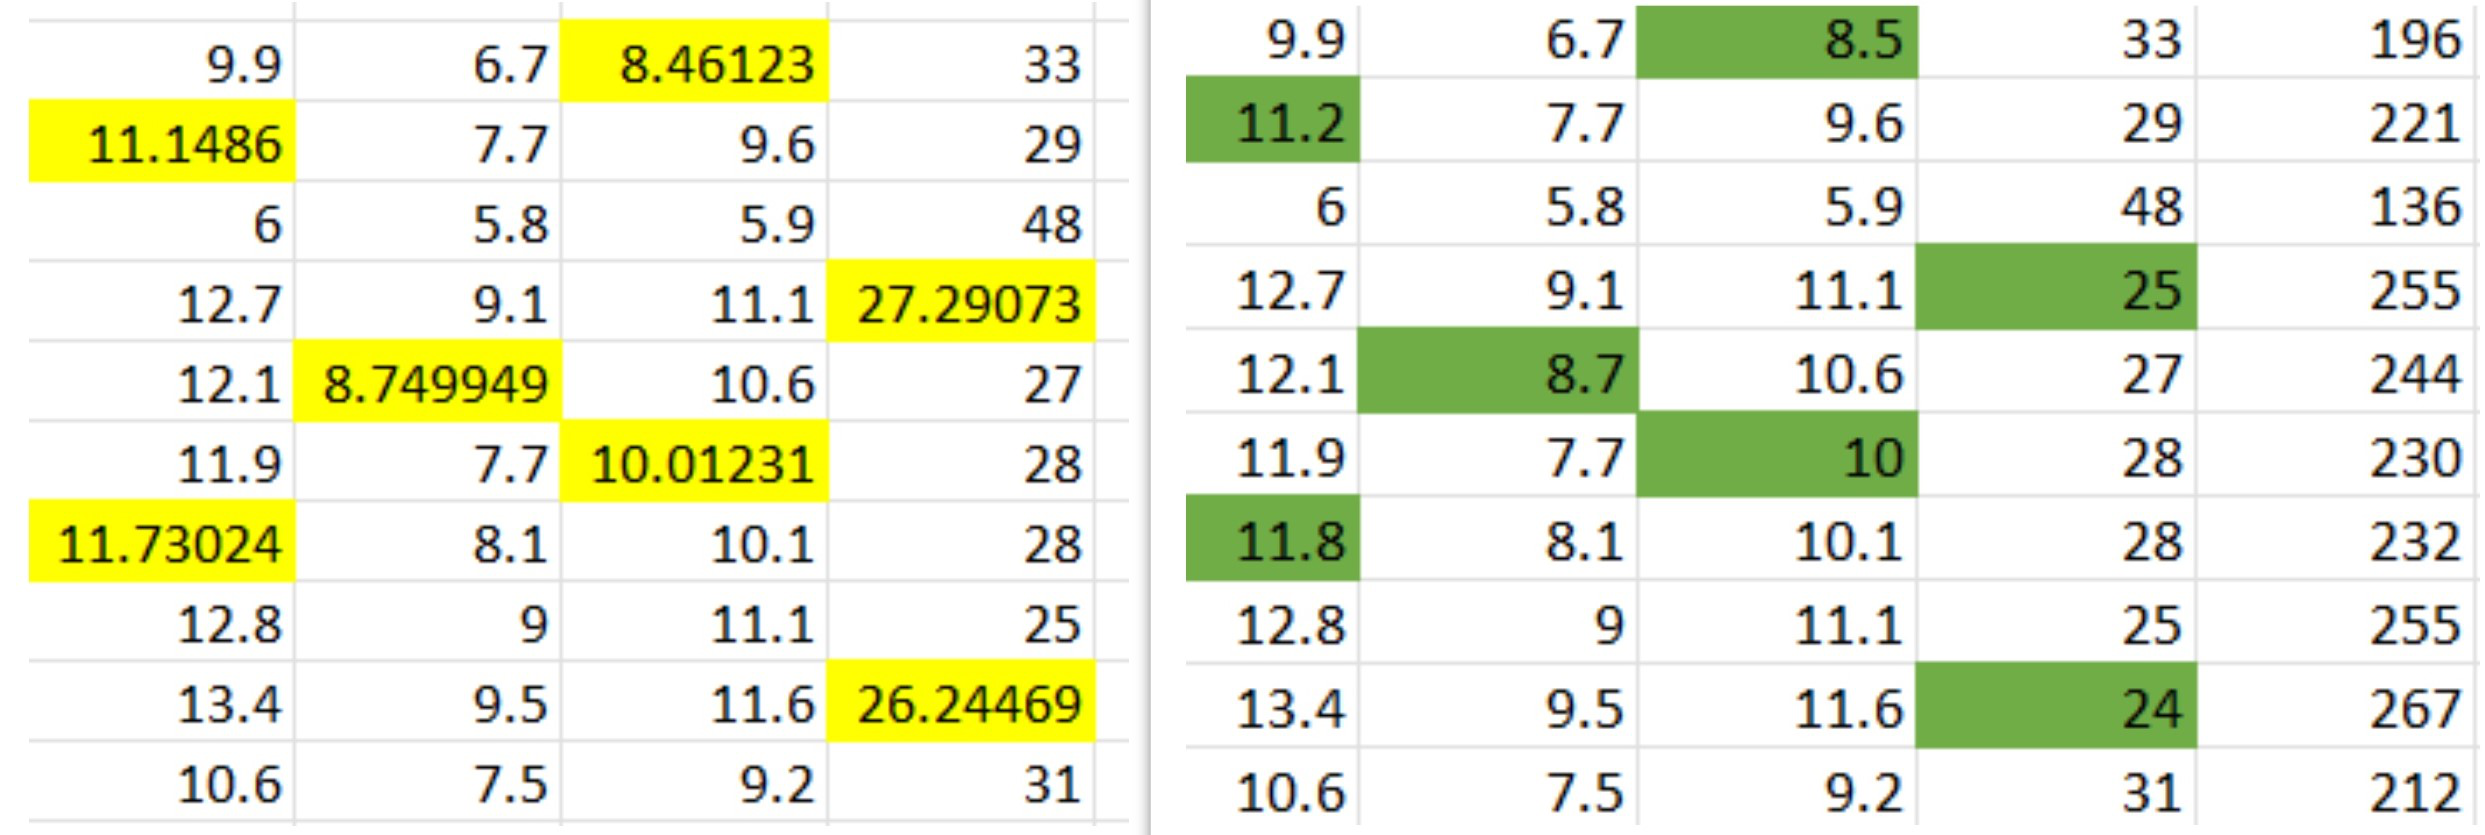

In [16]:
from PIL import Image
mice_image = Image.open('/kaggle/input/imputation-result/MICE.jpg')
mice_image

* First column - original value is 11.2 and imputed value is 11.14 , original value is 11.8 and imputed value is 11.73
>1. diff_1  = |11.14 - 11.2| = 0.06
>2. diff_2  = |11.73 - 11.8| = 0.07

* Second column - original value is 8.7 and imputed value is 8.74
>1. diff = |8.74 - 8.7| = 0.04

* Third Column - original value is 8.5 and imputed value is 8.46 , original value is 10 and imputed value is 10.01
>1. diff_1  = |8.5 - 8.46| = 0.06
>2. diff_2  = |10 - 10.01| = 0.01

* Fourth Columns - original value is 25 and imputed value is 27.29 , original value is 24 and imputed value is 26.244
>1. diff_1  = |25 - 27.290| = 2.29
>2. diff_2  = |25- 26.24| = 1.24

**SSE  = 6.79**


Conclusion

In [17]:
sse_list = [34.90 , 15.36,16.58,0.85 ,6.79]
imputer = ['mean' , 'mode','median','knn imputer','MICE']
pd.DataFrame(sse_list ,index = imputer)

# For the above problem, knn imputer generates the best results.

0
mean         34.90
mode         15.36
median       16.58
knn imputer   0.85
MICE          6.79

**Use case**
>* Knn imputer and MICE provide the finest results for imputation.
>* If the data contains outliers, we can substitute them with nan values and then use Knn imputer or MICE. it will give better result as compare to mean,mode,median